I have a basic interface for the monthly Airport data in the Ohare class. Ohare assumes only Ohare traffic, via pre-grepped input. Hanger code has static functions to retrieve Average delay time by category for the airport.

In [9]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from FAA import Ohare
from FAA import Hanger


In [10]:
faa = Ohare.Ohare(monthly_tffx_csv='../data/ohare/06_2017_ORD_AIR_TFFX.csv')

## Setup

In [20]:
faa.flights_from_ohare.iloc[:1,54:61].head()

,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1846.0,8,NaN,NaN,NaN,NaN,NaN


In [21]:
faa.flights_from_ohare.loc[:,'CarrierDelay':'LateAircraftDelay'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24719 entries, 0 to 49467
Data columns (total 5 columns):
CarrierDelay         5885 non-null float64
WeatherDelay         5885 non-null float64
NASDelay             5885 non-null float64
SecurityDelay        5885 non-null float64
LateAircraftDelay    5885 non-null float64
dtypes: float64(5)
memory usage: 1.8 MB


In [22]:
faa.flights_from_ohare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24719 entries, 0 to 49467
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(70), int64(21), object(19)
memory usage: 21.6+ MB


In [23]:
5885/24719

0.23807597394716615

We have 23% of the data for reasons why aircraft were delayed. 

**This Gives us the flights from O'hare that have records for why they were delayed**

In [30]:
categorized_del = faa.flights_from_ohare.dropna(subset=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])

In [60]:
import pandas as pd
import seaborn as sns

delays = pd.DataFrame(categorized_del.loc[:,'CarrierDelay':'LateAircraftDelay'].mean())
delays = delays.reset_index()
delays = delays.rename(columns={0: 'Time', 'index': 'Reason'})


,Reason,Time
0,CarrierDelay,20.776890
1,WeatherDelay,4.492778
2,NASDelay,17.962277
3,SecurityDelay,0.043500
4,LateAircraftDelay,28.139677


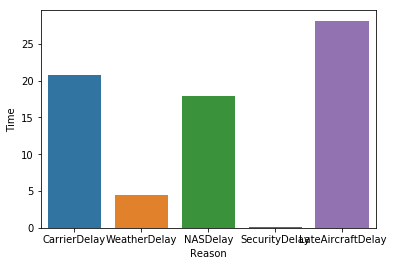

In [62]:
sns.barplot(x=delays['Reason'], y=delays['Time'])

## Function Creation

In [65]:
def monthly_delay_report(ports_outbound_flights):
    import pandas as pd
    import copy
    """For an airport's month, retrieve its outbound delays average and category"""
    
    only_with_delay_record = ports_outbound_flights.dropna(subset=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])

    delays = pd.DataFrame(only_with_delay_record.loc[:,'CarrierDelay':'LateAircraftDelay'].mean())
    delays = delays.reset_index()
    delays = delays.rename(columns={0: 'Time', 'index': 'Reason'})
    
    return copy.deepcopy(delays)

In [64]:
monthly_delay_report(faa.flights_from_ohare)

,Reason,Time
0,CarrierDelay,20.776890
1,WeatherDelay,4.492778
2,NASDelay,17.962277
3,SecurityDelay,0.043500
4,LateAircraftDelay,28.139677


In [66]:
def chart_monthly_delay_report(ports_outbound_flights):
    import seaborn as sns
    delays = monthly_delay_report(ports_outbound_flights)
    sns.barplot(x=delays['Reason'], y=delays['Time'])

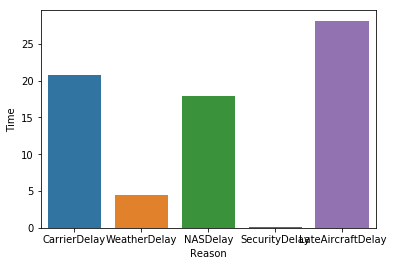

In [67]:
chart_monthly_delay_report(faa.flights_from_ohare)

## Hanger Code

In [11]:
from FAA import Hanger
Hanger.Hanger.monthly_delay_report(faa.flights_from_ohare)

,Reason,Time
0,CarrierDelay,20.776890
1,WeatherDelay,4.492778
2,NASDelay,17.962277
3,SecurityDelay,0.043500
4,LateAircraftDelay,28.139677


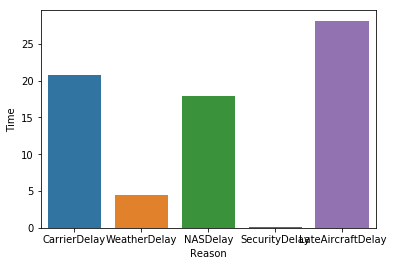

In [12]:
Hanger.Hanger.chart_monthly_delay_report(faa.flights_from_ohare)

In [8]:
Hanger.Hanger.monthly_delay_report(faa.flights_from_ohare)

,Reason,Time
0,CarrierDelay,20.776890
1,WeatherDelay,4.492778
2,NASDelay,17.962277
3,SecurityDelay,0.043500
4,LateAircraftDelay,28.139677
